### 23 Puissance 4

Des indications sont données dans le fichier `puissance4.py` pour b) et c). On peut représenter le jeu *Puissance 4* par une matrice $g$ où $g[i][j]$ représente le contenu de la colonne $i$ dans la rangée $j$: `None` pour vide, $0$ pour jaune et $1$ pour rouge. Chaque joueur fait tomber une pièce de sa couleur à tour de rôle dans la colonne de son choix. Le premier joueur à aligner (à l’horizontale, verticale ou en diagonale) 4 pièces de sa couleur gagne. Sur la figure, $g[0][0]=1$ et $g[3][2]=1$, et si *jaune* pose une pièce dans la 2e colonne alors *rouge* peut gagner en posant une pièce en $g[1][2]$.

a) Écrire une fonction qui prend en entrée une matrice $g$ et 2 entiers $i,j$, et vérifie si $g$ contient un alignement horizontal partant de $g[i][j]$ vers la droite (4 valeurs non vides identiques).

_Indication : il y a 7 colonnes et 6 rangées dans le jeu. Attention au numérotage (l'ordre est potentiellement inhabituel si on raisonne en terme d'indexation de matrice) des colonnes et rangées._

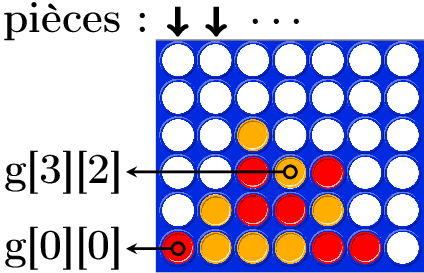

In [ ]:
def alignement1(g,i,j):
    """
    Entrée: 
    - une matrice g représentant les 7 colonnes * 6 lignes, 
    - indices de colonne i et de rangée j.
    Renvoie True ssi la matrice g admet un alignement horizontal vers la droite 
    en partant de i,j
    Déplacement dans la direction dx,dy = (1,0)
    """
    couleur = g[i][j]
    if couleur is None:
        return False
    # A compléter
    return False

# Test:
g1 = [[1, None, None, None, None, None], [0, 0, None, None, None, None], [0, 1, 1, 0, None, None], [0, 1, 0, None, None, None], [1, 0, 1, None, None, None], [1, None, None, None, None, None], [None, None, None, None, None, None]]
g2 = [[1, None, None, None, None, None], [0, 0, None, None, None, None], [0, 1, 1, 0, None, None], [0, 1, 0, None, None, None], [0, 0, 1, None, None, None], [1, None, None, None, None, None], [None, None, None, None, None, None]]
print(alignement1(g1,1,0))
print(alignement1(g2,1,0))

b) En déduire une fonction qui prend en entrée une matrice $g$ et détermine si elle contient au moins un alignement.


Indication : on va s'inspirer de la fonction précédente pour vérifier depuis tous les points $(i,j)$ s'il existe un alignement partant de $g[i][j]$.
Pour limiter les directions de recherche on observe que puisque on va tester toutes les cases $(i,j)$ il suffit de vérifier
- les alignements partant vers la droite
- ceux partant vers le haut
- ceux partant en diagonale descendante vers la droite
- ceux partant en diagonale ascendante vers la droite


Le plus simple si l'on ne souhaite pas beaucoup réfléchir est donc sans doute de définir 4 fonctions traitant chacune un de ces cas. Mais une approche plus élégante consiste à essayer de factoriser le code comme ci-dessous en observant que ces 4 fonctions effectuent essentiellement le même calcul, mais en se déplaçant dans des directions différentes sur la grille :

In [ ]:
def alignements_suffisants(g,i,j):
    """
    Entrée: 
    - une matrice g représentant les 7 colonnes * 6 lignes, 
    - indices de colonne i et de rangée j.
    Renvoie True ssi la matrice g admet un alignement suivant une des 4 directions ci-dessus
    en partant de i,j.
    dx,dy in [1,0),(0,1),(1,1),(1,-1)]
    """
    couleur = g[i][j]
    if couleur is None:
        return False
    for (dx,dy) in [(1,0),(0,1),(1,1),(1,-1)]:
        alignement = True
        if i + 3*dx <= 6 and 0 <= j+3*dy <= 5:
            # Le test dessus garantit qu'on ne risque pas de déborder de la matrice
            # A compléter
    return False

# Test:
#g2 = [[1, None, None, None, None, None], [0, 0, None, None, None, None], [0, 1, 1, 0, None, None], [0, 1, 0, None, None, None], [0, 0, 1, None, None, None], [1, None, None, None, None, None], [None, None, None, None, None, None]]
#print(alignements_suffisants(g2,1,0))#True

In [ ]:
def verifie_jeu(g):
    """ 
    Entrée: une matrice g
    Renvoie: True ssi la matrice contient un alignement.
    Complexité: un appel à alignements_suffisants par case de la matrice.
    """
    # A compléter
    return False

print(verifie_jeu(g2)) #True

c) (Titan) On suppose que c’est à *jaune* de jouer. Écrire une fonction qui renvoie la colonne dans laquelle il peut poser une pièce pour gagner immédiatement s’il y en a une, et $-1$ sinon.

<embed src="../images/puissance4-nsi.pdf" style="width:41mm" />


On pourrait penser qu'il faut compléter la fonction précédente pour indiquer de quelle couleur est l'alignement, mais ce n'est pas le cas: puisqu'il n'y a dans une partie normale pas d'alignement avant que jaune joue, s'il parvient à réaliser un alignement en posant une pièce jaune, c'est que cet alignement est jaune.

L'idée est donc simplement de tester pour chaque colonne si on crée un alignement en ajoutant une pièce. Si on a utilisé l'approche ci-dessus se contentant de tester les alignements vers la droite, il faut vérifier la présence d'alignement globalement et pas seulement ceux commençant par la pièce ajoutée.


In [ ]:
def solution_jeu(g):
    """
    Entrée: 
    - une matrice g représentant le jeu
    Renvoie le (premier) numéro de colonne permettant au joueur jaune de gagner, 
    et renvoie -1 s'il n'y en a pas.
    """
    for i in range(len(g)):
        j = 0
        # Compléter le code ici pour que :
        # - j soit la première valeur telle que "g[i][j] is not None" s'il y en a une
        # - j soit len(g[0]) sinon
        if j < len(g[0]):
            # Compléter le code pour poser une pièce jaune en i,j
            # Puis vérifier s'il y a un alignement. Si oui, agir en conséquence.
            # Puis "vider" la case (i,j)
    return -1


g3 = [[1, 0, 1, None, None, None], [0, 0, None, None, None, None], [0, 1, 1, 0, None, None], [0, 1, 0, 1, 0, None], [1, 0, 1, None, None, None], [1, None, None, None, None, None], [None, None, None, None, None, None]]
g4 = [[1, 1, None, None, None, None], [0, 0, 1, 0, None, None], [0, 1, 1, 0, 0, None], [0, 1, 0, None, None, None], [1, 0, 1, None, None, None], [1, None, None, None, None, None], [None, None, None, None, None, None]]
g5 = [[1, 1, None, None, None, None], [0, 0, 1, 0, 1, None], [0, 1, 1, 0, 0, None], [0, 1, 0, None, None, None], [1, 0, 1, None, None, None], [1, None, None, None, None, None], [None, None, None, None, None, None]]
print(solution_jeu(g1)) # -1
print(solution_jeu(g3)) # 1
print(solution_jeu(g4)) # 1
print(solution_jeu(g5)) # 1
